In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('../../color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/scikit/nuc_conc/varyhp_sfco/'
preds = ['reactor', 'burnup', 'enrichment']
alg = ['knn', 'dtree']
idx = np.arange(1, 11)
df = [2, 3]
csv_end = '_nuc29_ext_test_compare.csv'
col  = ['Neg Err', 'Std']
err = 'AbsError'

In [5]:
steps = 10
k_list = np.linspace(1, 10, steps).astype(int)
depth_list = np.linspace(25, 85, steps).astype(int)
feats_list = np.linspace(9, 29, steps).astype(int)

## kNN

In [6]:
levels = [preds, col]
knn = pd.DataFrame(index=k_list, columns=pd.MultiIndex.from_product(levels, names=['Parameter', 'Metric']))
for p in preds:
    for i in idx:
        df = pd.read_csv(path + p + '_' + 'knn_idx' + str(i) + '_df2' + csv_end)
        if p == 'reactor':
            sign = 1
        else:
            sign = -1
        knn.loc[k_list[i-1], (p, col[0])] = sign * df[err].mean()
        knn.loc[k_list[i-1], (p, col[1])] = sign * df[err].std()
knn

Parameter   reactor             burnup          enrichment         
Metric      Neg Err       Std  Neg Err      Std    Neg Err      Std
1          0.625743   0.48441 -15179.8 -13170.4    -1.4803 -1.07474
2          0.625743   0.48441 -15172.1   -13177   -1.47733  -1.0774
3          0.625743   0.48441 -15243.5   -13232    -1.4789 -1.07947
4          0.613861  0.487346 -15274.4   -13264   -1.48011 -1.08038
5          0.613861  0.487346 -15294.3 -13285.1   -1.48101 -1.07915
6          0.613861  0.487346 -15311.4 -13296.9   -1.47997   -1.081
7               0.6  0.490384 -15319.7 -13302.9   -1.48053 -1.08177
8           0.59802  0.490784 -15322.2   -13307   -1.48047 -1.08132
9          0.592079  0.491936 -15326.3 -13312.7   -1.48037 -1.08124
10         0.592079  0.491936 -15331.1 -13320.4   -1.48026 -1.08212

## DTree

In [7]:
dtr_d = pd.DataFrame(index=depth_list, columns=pd.MultiIndex.from_product(levels, names=['Parameter', 'Metric']))
dtr_f = pd.DataFrame(index=feats_list, columns=pd.MultiIndex.from_product(levels, names=['Parameter', 'Metric']))
for p in preds:
    for i in idx:
        df_d = pd.read_csv(path + p + '_' + 'dtree_idx' + str(i) + '_df2' + csv_end)
        df_f = pd.read_csv(path + p + '_' + 'dtree_idx' + str(i) + '_df3' + csv_end)
        if p == 'reactor':
            sign = 1
        else:
            sign = -1
        dtr_d.loc[depth_list[i-1], (p, col[0])] = sign * df_d[err].mean()
        dtr_d.loc[depth_list[i-1], (p, col[1])] = sign * df_d[err].std()
        dtr_f.loc[feats_list[i-1], (p, col[0])] = sign * df_f[err].mean()
        dtr_f.loc[feats_list[i-1], (p, col[1])] = sign * df_f[err].std()
dtr_d

Parameter   reactor             burnup          enrichment          
Metric      Neg Err       Std  Neg Err      Std    Neg Err       Std
25         0.459406  0.498844   -14588 -15384.7  -0.310711 -0.376996
31         0.528713   0.49967 -14667.5 -15441.7  -0.312592 -0.375405
38         0.433663  0.496071 -14656.2 -15469.4  -0.306501 -0.375262
45         0.524752  0.499882 -14680.9   -15451  -0.307491 -0.372087
51         0.526733   0.49978 -14680.3   -15452   -0.31679 -0.374409
58         0.453465  0.498323   -14850 -15558.2  -0.308869 -0.369413
65         0.427723  0.495239 -14681.3 -15450.7  -0.309036 -0.376652
71         0.550495  0.497937 -14684.3 -15450.5  -0.308236 -0.371946
78         0.520792  0.500063 -14668.7   -15442  -0.316798  -0.37614
85         0.429703  0.495525 -14654.1 -15451.4  -0.305166 -0.368574

## Plots

In [32]:
dtr_d['reactor']['Neg Err']

25    0.459406
31    0.528713
38    0.433663
45    0.524752
51    0.526733
58    0.453465
65    0.427723
71    0.550495
78    0.520792
85    0.429703
Name: Neg Err, dtype: object

In [14]:
xlbls = ['k for kNN', 'Max Depth for DTree', 'Max Features for DTree']
def plot_vc(pred):
    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,6))
    if pred == 'reactor':
        axs[0].set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
    else:
        err = 'Negative MAE'
        if pred == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        else:
            yaxlbl = err + ' [% U235]'
    dfs = [knn[pred], dtr_d[pred], dtr_f[pred]]
    for i, df in enumerate(dfs):
        x = df.index.tolist()
        axs[i].set_xlabel(xlbls[i], fontsize=20, labelpad=15)
        y = np.array(df[col[0]], dtype=float)
        sd = np.array(df[col[1]], dtype=float)
        axs[i].plot(x, y, 'o-')
        axs[i].fill_between(x, y - sd, y + sd, alpha=0.35)

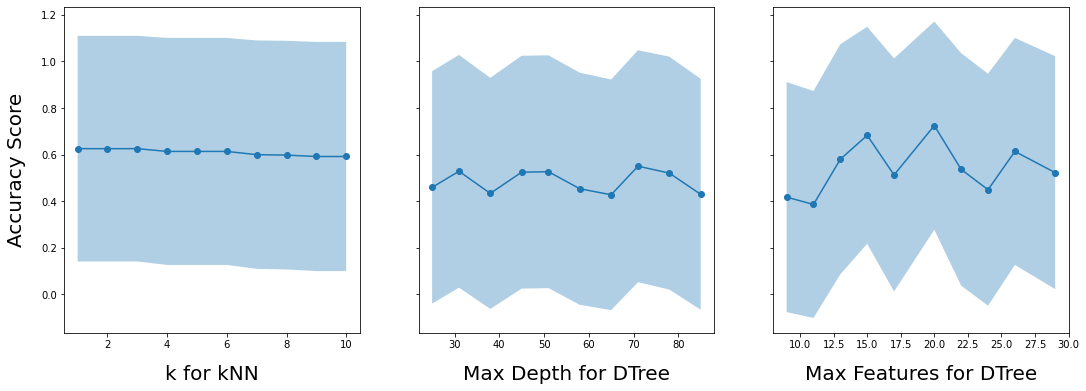

In [15]:
plot_vc('reactor')

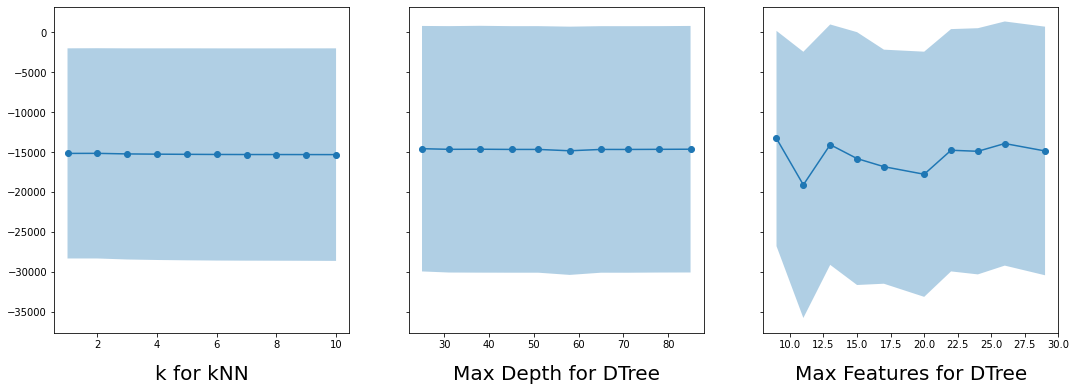

In [16]:
plot_vc('burnup')

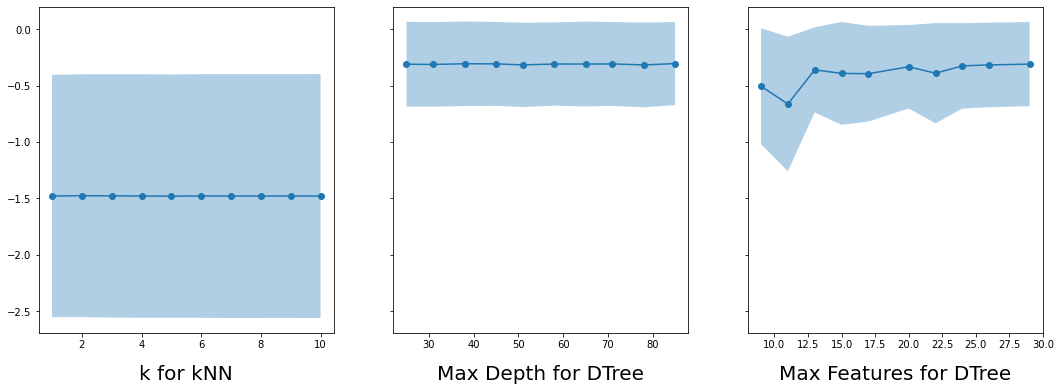

In [17]:
plot_vc('enrichment')